In [13]:
from scipy.stats import binom as binom_dist
from scipy.stats import beta as beta_dist
import numpy as np

from matplotlib import pyplot as plt

## **Group 13**
- **Mikkel Agerbo Essendrop**
- **Anton Mosquera Storgaard, s214611**
- **Gustav Hylsberg Jacobsen, s214374**

All group members share equal responsibility for all three parts of this assignment. The work presented here represents a collective effort, and each member has contributed to understanding and completing the tasks.


$\Huge \textbf{Part 1:}$

We record following data Customers: $N = 115$, Customers with purchase: $y = 4$, we want to deduce the probability that at least one of the next 20 Customers : $N^* = 20$ makes a purchase.

We define the following distributions

\begin{align}

\theta &\sim Beta(a_0,b_0) \\
y \vert \theta &\sim Binomial(N,\theta)

\end{align}

we now that $a_0 =  b_0 = 1$, so the prior is given as the $\theta \sim Uniform(0,1)$

$\textbf{Task 1.1}$ Compute the prior mean of $\theta$ and provide a 95% credibilty interval for the prior:

We could deduce that the prior is uniformly distributed where the mean is found by the following
\begin{equation*}
\mathbb{E}(\theta) = \frac{a}{a+b} = \frac{1}{1+1} = \frac{1}{2}
\end{equation*}

When we are dealing with a uniform prior the credibility interval would simply quivalent to 95% of the possible outcomes within the distribution between 0 and 1 centered around the mean, thus the credibility interval becomes

\begin{equation*}
(0.025, 0.975)
\end{equation*}

$\textbf{Task 1.2}$ Compute the posterior mean of $\theta$ and provide a 95% credibility interval for the posterior

We can start of by writing up our binomial likelihood PMF function

\begin{equation}
p(y \vert \theta) = \binom{115}{4}p^4(1-p)^{115-4}
\end{equation}

We know that the Beta distribution is conjugate on the likelihood which means our posterior distribution will follow the same distribution as our prior.

Our posterior is then given as 

\begin{align}
p(\theta \vert y, N) &= Beta(a + y, b + N - y) \\
p(\theta \vert y, N) &= Beta(5,112)
\end{align}

We find the mean in the same way we found the mean for the Beta distribution in Task 1.1

\begin{equation*}
 \mathbb{E}(\theta \vert y, N) = \frac{5}{5+112} = \frac{5}{117} \approx 0.043
\end{equation*}

We use a snippet of the python code from handout 1 in order to determine the credibility interval



In [6]:
theta_lower, theta_upper = beta_dist.interval(95/100, a=5, b=112)
print(f'95%-credibility interval: [{theta_lower:3.2f}-{theta_upper:3.2f}]')

95%-credibility interval: [0.01-0.09]


$\textbf{Task 1.3}$ Compute and plot the posterior predictive distribution for $y^*$ given $y = 4$

We know that the posterior predictive distribution is given as

\begin{equation}
p(y^* | y) = \int p(y^* \vert \theta) p(\theta \vert y) d\theta
\end{equation}

We choose to sample different values of $\theta$ from the posterior and then afterwards we sample new predictions $y^*$ from the posterior predictive using the different values of $\theta$

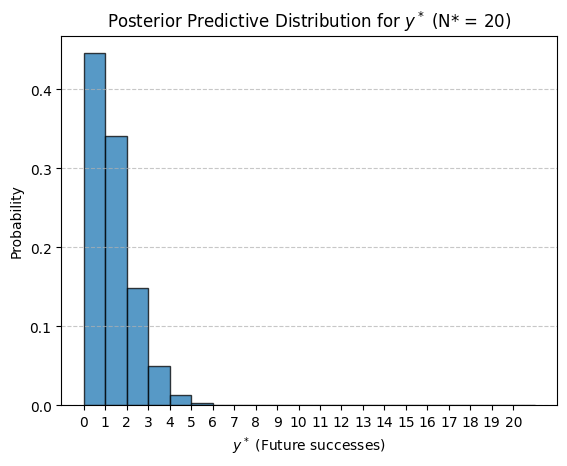

(np.float64(0.4459), np.float64(0.5541))

In [ ]:

a, b = 5, 112  # Parameters of the posterior Beta distribution
N_star = 20  # Future trials

#We sample from the posterior distribution in order to visualize the posterior
#predictive with the samples we get.
theta_samples = np.random.beta(a, b, 10000)

#Once we have the posterior samples we can sample from the binomial predictive distribution.
y_star_samples = np.random.binomial(N_star, theta_samples)

# Step 3: Compute and plot the posterior predictive distribution
plt.hist(y_star_samples, bins=range(N_star+2), density=True, alpha=0.75, edgecolor='black')
plt.xlabel(r'$y^*$ (Future successes)')
plt.ylabel('Probability')
plt.title(f'Posterior Predictive Distribution for $y^*$ (N* = {N_star})')
plt.xticks(range(N_star+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


$\textbf{Task 1.4}$ What is the posterior predictive probability that at least one of the next $N^* = 20$ will make a purchase?

We simply negate the question and says what is the probability that no customers made a purchase.

\begin{equation*}
    p(y^* >= 1 | N^* = 20) = 1 - p(y^* = 0 | N^* = 20)
\end{equation*}



In [48]:
print(f'Probability of at least one future success: {1 - np.mean(y_star_samples == 0)}')

Probability of at least one future success: 0.5541


This says the probability that at least one made a purchase is around 55.4%

$\textbf{1.5}$ Compute mean and variance of the posterior predictive distribution for $y^*$

We know that the posterior predictive distribution is distributed as follows

\begin{equation*}
p(y^*) \sim BetaBinomial(N^*, a, b)
\end{equation*}

where the mean and variance is given as 

\begin{align}
\mathbb{E}(y^*) &= N^* \frac{a}{a+b} \\
\sigma^2 &= N^* \frac{ab(a+b+N^*)}{(a+b)^2(a+b+1)}
\end{align}

We plugin our values

\begin{align}
\mathbb{E}(y^*) &= 20 \cdot \frac{5}{5+112} \approx 0.85 \\
\sigma^2 &= 20 \cdot \frac{5 \cdot 112(5+112+20)}{(5+112)^2(5+112+1)} \approx 0.95
\end{align}

We verify the results by taking the mean and variance of our sampled values.

In [44]:
print(f"Mean of posterior predictive: {np.mean(y_star_samples):.2f}")
print(f"Variance of posterior predictive: {np.var(y_star_samples):.2f}")

Mean of posterior predictive: 0.85
Variance of posterior predictive: 0.93


$\Huge \textbf{Part 2:}$

In part 2 we will be working with Linear Gaussian systems.

We let $z_1,z_2 \in \mathbb{R^2}$, and $y \in \mathbb{R}$ be random variables and we consider the following system

\begin{align}
z_1 &\sim \mathcal{N}(0,vI) \tag{1} \\
z_2 \vert z_1 &\sim \mathcal{N}(z_1,vI) \tag{2} \\
y \vert z_2 &\sim \mathcal{N}(a^Tz_2,\sigma^2) \tag{3}
\end{align}

where $a \in \mathbb{R^2}$ is constant. The joint distribution of $(z_1, z_2, y)$ is given by

\begin{equation}
p(y,z_1,z_2) = p(y \vert z_2)p(z_2 \vert z_1) p(z_1) \tag{4}
\end{equation}

Let's try and put some words on the information provided here. For instance, we can see that the distribution of $z_2|z_1$ is conditionally dependent on $z_1$.

We also see that $y$ must be conditionally independent of $z_1$ since if $z_2$ is known, then $z_1$ is not needed, and thus we have independence. This allows us to write:

\begin{equation}
p(y \vert z_1,z_2) = p(y | z_2) \tag{5}
\end{equation}

$\textbf{Task 2.1}$ Determine the distribution $p(y)$.

We start by wanting to compute $p(z_2)$ first, as this allows us to use the following equation:

\begin{equation}
p(y) = \int p(y \vert z_2) p(z_2)dz_2 \tag{6}
\end{equation}

We make use of both the Conditional rule and the Sum rule where we have the following 
\begin{align} 
P(b) &= \int p(a, b)da  \hspace{1cm}
p(a \vert b) &= \frac{p(a, b)}{p(b)} \tag{7}
\end{align}

This means that we can do this manipulation

\begin{align*}
p(z_2 \vert z_1) &= \frac{p(z_2, z_1) }{p(z_1)} \hspace{1cm}
p(z_2, z_1) = p(z_2 \vert z_1) p(z_1) \tag{8}

\end{align*}

This expression can be substitued into the sum rule, and now we want to marginalize out the $z_1$ factor so we are left with the $z_2$ distribution

\begin{equation*}
p(z_2) = \int p(z_2 | z_1) p(z_1) dz_1 \tag{9}
\end{equation*}

Once we are here we can utilize the equations for bayes rules for gaussian given in Murphy (3.37)

\begin{align*}
        p(z_2) &\sim \mathcal{N}(0 + z_1, vI + vI) \\ &\sim \mathcal{N}(z_1, 2vI) \\ &\sim  \mathcal{N}(0,2vI) \tag{10}
\end{align*}

We now complete our equation for $p(y)$ and marginalize out $z_2$ this time, we follow the same steps as previously.


\begin{align*}
    p(y)  &\sim \mathcal{N}(a^Tz_2 + 0, \sigma^2 + 2vI) \\
          &\sim a^T \cdot \mathcal{N}(z_2, \sigma^2 + 2vI) \\
          &\sim \mathcal{N}(0, a^T \sigma^2 + 2va^T) \tag{11}
\end{align*}

$\textbf{Task 2.2 }$ Determine the distribution $p(y,z_2 | z_1)$

We use the rules of conditional independence to determine this joint distribution. Lets start by using the chain rule of probability so we can rewrite

\begin{equation*}

p(y,z_2 | z_1) = p(y|z_2,z_1)p(z_2 \vert z_1) \tag{12}

\end{equation*}

We remember our deducition in equation (5) and our expression becomes

\begin{equation*}

p(y,z_2 | z_1) = p(y|z_2)p(z_2 | z_1) \tag{13}

\end{equation*}

When we multiply two gaussians we get a two-dimensional gaussian distribution, so our mean vector will consist of the means of $y$ and $z_2$, and our covariance matrix include the covariance between and the individual variances.

\begin{equation*}

\mathcal{N} \left(\begin{bmatrix} \mathbb{E}(y | z_1) \\ \mathbb{E}(z_2) \end{bmatrix} , \begin{bmatrix} \sigma^2(y|z_1) & \Sigma(y,z_2) \\ \Sigma(y,z_2) & \sigma^2(z_2|z_1) \end{bmatrix} \right) \tag{14}

\end{equation*}

Here we see that the only value we are missing in order to plug in our distribution is the covariance. Covariance between $y$ and $z_2$ is given by the following equation 

\begin{align*}

\Sigma(y, z_2) &= \mathbb{E}[(y-\mathbb{E}[y | z_1])(z_2-\mathbb{E}[z_2  \vert z_1])^T] \\
            &= \mathbb{E}[(a^Tz_2-a^Tz_1)(z_2-z_1)^T] \\
            &= a^T \cdot \mathbb{E}[(z_2 - z_1)(z_2-z_1)^T] \\
            &= a^T \cdot vI \\
            &= va^T \tag{15}
\end{align*}

Lets quickly explain some intuition behind step 2 and three in equation (15). We know that from our model that $y = a^Tz_2$, so when we take the expected value we get 
\begin{equation*}
\mathbb{E}(y | z_1) = \mathbb{E}(a^Tz_2) = a^T\mathbb{E}(z_2) = a^Tz_1 \tag{16}
\end{equation*}

We also take advantage of the fact that $z_2 - z_1$ follow a gaussian noise model with variance $vI$ so we can substitue that in. The uncertainties added in these steps offset each other due to difference in signs. Our final distribution becomes

\begin{equation*}

p(y, z_2 | z_1) \sim \mathcal{N} \left(\begin{bmatrix} a^Tz_1 \\ z_1 \end{bmatrix} , \begin{bmatrix} va^Ta + \sigma^2 & va^T \\ va & vI \end{bmatrix} \right) \tag{17}

\end{equation*}

where the covariance term has to be symmetric so we remove the transpose in the left corner.

$\textbf{Task 2.3}$ Determine the distribution $p(y \vert z_1)$

We have actually already found the distribution, the mean and variance can be extracted from the distribution we just described, by looking at the mean and variance in the vector and matrix.

\begin{equation*}
p(y | z_1) \sim \mathcal{N} (a^Tz_1, \sigma^2 + va^Ta) \tag{18}
\end{equation*}

$\textbf{Task 2.4}$ Determine the distribution $p(z_1 \vert y)$

Lets start by writing up bayes theorem for this distribution given as 

\begin{equation*}
    p(z_1 | y) = \frac{p(y|z_1)p(z_1)}{p(y)} \tag{19}
\end{equation*}

We again use the equations described in Murphy and we see that for the gaussian linear models posterior distribution described as

\begin{equation*}
    p(z_1 | y) \sim \mathcal{N}(\mu_{z_1 | y}, \Sigma_{z_1|y}) \tag{20}
\end{equation*}

We have the following 

\begin{equation}
\Sigma_{z | y}^{-1} = \Sigma_z^{-1} + \mathbf{W}^T \Sigma_y^{-1} \mathbf{W} \tag{21}
\end{equation}

\begin{equation}
\mu_{z | y} = \Sigma_{z | y} \left[ \mathbf{W}^T \Sigma_y^{-1} (y - b) + \Sigma_z^{-1} \mu_z \right] \tag{22}
\end{equation}

We now have to substitue in our know values in these expressions, we start by substituting in our terms for the variance and we end up with

\begin{align*}
\Sigma_{z_1 | y}^{-1} &= (vI)^{-1} + a^T (v a^T a + \sigma^2)^{-1} a, \\
&= \frac{1}{v} I + \frac{a a^T}{v a^T a + \sigma^2}. \tag{23}
\end{align*}

We flip the exponent so we get

\begin{equation*}
\Sigma_{z_1 | y} = \left( \frac{1}{v} I + \frac{a a^T}{v a^T a + \sigma^2} \right)^{-1}. \tag{24}
\end{equation*}

After having found this term we can now substitue our values into the expression for the mean given in equation (22)

\begin{align*}
\mu_{z_1 | y} &= \Sigma_{z_1 | y} \left[ a^T (v a^T a + \sigma^2)^{-1} y + (vI)^{-1} \cdot 0 \right] \\
&= \Sigma_{z_1 | y} \left( \frac{a}{v a^T a + \sigma^2} y \right) \tag{25}
\end{align*}

Leaving us with a final distribution given as

\begin{equation}
p(z_1 | y) \sim \mathcal{N} \left( \frac{v a}{v a^T a + \sigma^2} y, \left( \frac{1}{v} I + \frac{a a^T}{v a^T a + \sigma^2} \right)^{-1} \right). \tag{26}
\end{equation}



$\Huge \textbf{Part 3:}$

In part 3 we will be working with conjugate models.